# CTF simulation notebook 

This notebook shows the effect of various parameters on the contrast transfer function in transmission electron microscopy. While the code is all my own, the equations were taken from an excel spreadsheet by Henning Stahlberg (Henning.Stahlberg@unibas.ch, Sept 2020, http://c-cina.org© Henning Stahlberg, Henning.Stahlberg@unibas.ch, Sept 2020, http://c-cina.org). This spreadsheet can be downloaded from [here](https://www.c-cina.org/oldlbem/research/research/methods/software/ctf-simulation/https://www.c-cina.org/oldlbem/research/research/methods/software/ctf-simulation/) and was a great influence in this work. The creation of this was also heavily influenced by an [ipython notebook](https://github.com/geoffwoollard/learn_cryoem_math/blob/master/nb/2d_class_fourier.ipynb) found on [Geoff Wollard's github](https://github.com/geoffwoollard/learn_cryoem_math/tree/masterhttps://github.com/geoffwoollard/learn_cryoem_math/tree/master), which is excellent. Although I didn't directly take any of the code from here, it was a big influence is definitely worth checking out if you are interested! 

This whole mini-project started so I could plot some figures for my thesis, however curiosity took over and I wanted an easier way to directly see the effect of a number of parameters on the CTF. Hope you enjoy it! 

In [1]:
# Import functions to create the CTF data and make it a 2D image. 
from CTF_functions import create_CTF_data, make_2D_array, apply_ctf_to_image

#import functions to plot the data: 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.widgets import Slider
import matplotlib.gridspec as gridspec
plt.gray()

#Import image handling library openCV
import cv2

<Figure size 640x480 with 0 Axes>

### Input parameters: 

These are some initial parameters to play with. Feel free to edit these but most of them can be adjusted with sliders below. 

In [2]:
#Parameters input

voltage = 100
cs = 1.4
Cc = 1.8
additional_phase_shift=0 #Phase shift from phase plate
defocus = 500 #defocus in nm (negative)
amplitude_contrast = 0.07
angle_of_source = 0.01 # ai
pixel_size=1 #(in nm)
energy_spread = 0.7 #Energy spread from source - this will depend on the type of electron source - FEG has much better energy coherence vs filament etc.

### Slider functions

These are functions that update the plot when each slider for values changes. This cell needs to be run to define the functions, however beyond this can broadly be ignored unless you have a special interest making interactive plots. 

In [3]:
# These are the functions to update the plots as the sliders change

def update_plot():
    global data
    data, data2D = create_CTF_data(defocus=defocus, voltage=voltage, cs=cs, Cc=Cc, additional_phase_shift=additional_phase_shift,amplitude_contrast = amplitude_contrast, angle_of_source=angle_of_source,pixel_size=pixel_size, shape=500, energy_spread = energy_spread)
    #print(voltage)
    im2d.set_data(data2D)
    Envelope_line[0].set_ydata(data['Envelope'])
    PS_line[0].set_ydata(data['Power Spectrum'])
    ctf_line.set_ydata(data['CTF'])
    ctf_line.set_xdata(data['Resolution (1/nm)'])
    Envelope_line[0].set_xdata(data['Resolution (1/nm)'])
    PS_line[0].set_xdata(data['Resolution (1/nm)'])

    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xticks_labels)
    ctf_line.set_ydata(data['CTF'])
    
    im_filtered = apply_ctf_to_image(data2D, example_im)
    filtered_im.set_data(im_filtered)
    fig.canvas.draw_idle()

def update_defocus(value):
    global defocus
    defocus=value
    update_plot()

def update_voltage(value):
    global voltage
    voltage=value
    update_plot()

def update_cs(value):
    global cs
    cs=value
    update_plot()

def update_px(value):
    global pixel_size
    pixel_size=value
    update_plot()

def update_energy_spread(value):
    global energy_spread
    energy_spread = value 
    update_plot()

### Open an example image 

We want to see the effect of the CTF on an example image. There are a few options for this, for example a normal image, a TEM image, an example sketch and a protein model. I will leave the code for a few options and highlight how you can change these below. 

### Example Sketch
I have doodled a little sketch with some random high and low resolution features. This is meant to loosely reflect nanoparticles with high resolution lattace planes. Despite its simplicity, I think it can help show some features. 

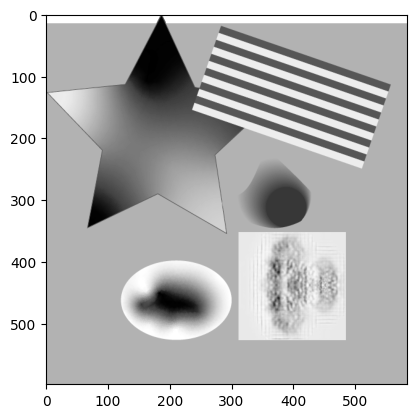

In [4]:
import cv2
im_example = cv2.imread('example_im.png') #Replace the 'example_im.png' with your own image (in the same folder) if you want! 
im_example = cv2.cvtColor(im_example, cv2.COLOR_BGR2GRAY)
plt.imshow( im_example)
plt.show()

### Interactively Plot!

In [8]:
%matplotlib 

#Parameters input

voltage = 100
cs = 1.4
Cc = 1.8
additional_phase_shift=0 #Phase shift from phase plate
defocus = 500 #defocus in nm (negative)
amplitude_contrast = 0.07
angle_of_source = 0.01 # ai
pixel_size=0.1 #(in nm)
energy_spread = 0.7 #Energy spread from source - this will depend on the type of electron source - FEG has much better energy coherence vs filament etc.



n = 500 #Number of values to plot in 2D 

example_im = im_example #Image to apply CTF to - change this here if you want to use your own image! 


#print(cs)

data, data2D = create_CTF_data(defocus=defocus, voltage=voltage, cs=cs, Cc=Cc, additional_phase_shift=additional_phase_shift,amplitude_contrast = amplitude_contrast, angle_of_source=angle_of_source,pixel_size=pixel_size, shape=500)

#print(data, data2D)
colors = ['#BB0E5F','#83BACC','#502673']


fig= plt.figure(figsize=(9,9))
widths = [3, 1, 3]
heights = [2, 2, 1]
gs = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)





#Create sliders
defocusslider_ax = plt.axes([0.2, 0.22, 0.6, 0.04])  # Adjust the position and size as needed    
defocusslider = Slider(defocusslider_ax, 'Defocus (nm)', 0, 5000, valinit=defocus)
defocusslider.on_changed(update_defocus)
    
voltage_ax = plt.axes([0.2, 0.17, 0.6, 0.04])  # Adjust the position and size as needed
voltage_slider = Slider(voltage_ax, 'Voltage (kV)', 80, 300, valinit=voltage)
voltage_slider.on_changed(update_voltage)
   
    
csslider_ax = plt.axes([0.2, 0.02, 0.6, 0.04])  # Adjust the position and size as needed
cs_slider = Slider(csslider_ax, 'Spherical\n Aberration (mm)', 0, 3.00, valinit=cs)
cs_slider.on_changed(update_cs)

pxslider_ax = plt.axes([0.2, 0.07,0.6,0.04])
px_slider = Slider(pxslider_ax, 'Pixel Size (nm) \n (Magnification)', 0.04, 1, valinit=pixel_size)
px_slider.on_changed(update_px)

energy_spread_ax = plt.axes([0.2, 0.12,0.6,0.04])
energy_spread_slider = Slider(energy_spread_ax, 'Energy spread (\u0394E, eV)', 0, 2, valinit=energy_spread)
energy_spread_slider.on_changed(update_energy_spread)



#ax1 = fig.add_subplot(311)
ax1 = fig.add_subplot(gs[0,:])
ctf_line, =ax1.plot(data['Resolution (1/nm)'], data['CTF'], colors[0], label='CTF')
Envelope_line = ax1.plot(data['Resolution (1/nm)'], data['Envelope'],colors[1], label='Envelope Function')
PS_line = ax1.plot(data['Resolution (1/nm)'],data['Power Spectrum'],colors[2], label='Power Spectrum')
#plt.plot(data['Resolution (1/nm)'], data['sin(W)'])
ax1.set_title('Contrast Transfer Function')
ax1.set_xlim(0, 10)
ax1.set_yticks([1,0,-1])
ax1.legend(fontsize=8)

xticks= range(0,12,1)
xticks_labels =[0]
xticks_labels+= [round(1/x,2) for x in xticks if x!=0]
ax1.set_xlabel('Resolution (nm)')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks_labels)
#filtered_by_pixelsize = df.loc[df['Resolution (nm)']>nyquist ]

ax2 = fig.add_subplot(gs[1,0])
im2d =ax2.imshow(data2D, cmap='gray')
ax2.set_title('Power Spectrum')
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_subplot(gs[1,1])

ax3.imshow(example_im)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('Original image')
ax4 = fig.add_subplot(gs[1,2])  

im_filtered = apply_ctf_to_image(data2D, example_im)
filtered_im = ax4.imshow(im_filtered)
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_title('Transformed image') 
ax5 = fig.add_subplot(gs[2,:])
ax5.set_visible(False)


row_spacing = [0.2, 0.5, 0.1]  
col_spacing = [0.5, 0.1, 0.2] 

plt.subplots_adjust(wspace=0.125, hspace=0.31)
plt.show()

Using matplotlib backend: MacOSX


## Notes

I wanted to highlight some things to consider with the plotting, and then below discuss some of points that this plotting has helped me understand. 

**Pixel Size slider is for the 2D power spectrum** - It will affect all of the plots because of how I have made them. Changing the pixel size is essentially just increasing the sampling of the plot, so for the 2D plot, a higher sampling rate leads to a perfectly formed plot. The transformed image is multiplied (in the frequency domain) by the 2D power spectrum, so the changes in the image are due to the changes in this. The image should zoom in and out with changes in the magnification, however I chose to ignore this. 

**The CTF is always a dampened sine wave** - With a small pixel size the 2D plot can start to look very ugly, with sharp corners and sometimes skipping one of the peaks or troughs of the wave. This is an artefact of undersamping of the plot. Increasing the pixel size adjusts how many points there are, and will show a much cleaner plot. 

## Takeaways

**High defocus gives better contrast but worse resolution** - Well this probably won't be a new lesson for experinced TEM users, but its nice to simulate the effect. High defocus dampens the CTF at high resolutions, but it also shifts the first peak to lower resolution values, increasing the contrast for low resolutions. This affect can dramatically increase contrast, but the image does look pretty blurry...

**Lower voltages also give better contrast but worse resolution** - This point is quite striking, to maximise contrast at low resolutions turn the voltage down to the minimum (here I allow 80kV). Importantly however, other factors are also at play when this is done in real life, for example higher energy (voltage) electron beams are able to penetrate samples further, meaning that this only holds true for thin samples. Lower voltage also leads to increased electron scattering ('lower voltage gives higher image contrast, due to the larger elastic-scattering cross section (proportional to 1/v2 where v is electron speed)' - [Egerton, 2014](https://www.sciencedirect.com/science/article/pii/S0304399114000424#:~:text=An%20accelerating%20voltage%20of%20100,absence%20of%20lens%2Daberration%20correction.)

**The envelope function limits resolution** - The envelope function multiplies a sine wave (not plotted here) which describes the oscillations, to produce the accurate CTF, which is dampened as a function of resolution. The envelope function is primarily the affect of chromatic aberration which is the difference in focusing of different energy of electron beam. The affect of this aberration therefore depends on the accelerating voltage and the range of energies within the electron beam which is the energy spread. The energy spread depends on the electron source and is a major reason why field emission guns are better than lanthenum hexaboride crystals which are better than tungsten filaments. The envelope is majorly affected by: 

- Energy spread (as described above)
- Accelerating voltage
- Chromatic aberration constant (Cc)
- Defocus





